In [1]:
# Step 1: Import required libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the pretrained YOLOv8 model (nano version for speed)
# This auto-downloads weights from Ultralytics Hub
model = YOLO("yolov8n.pt")
print("✅ YOLOv8 model loaded successfully!")

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

✅ YOLOv8 model loaded successfully!


In [3]:
# Step 3: Run object detection on a sample image
img_path = "https://ultralytics.com/images/bus.jpg"
results = model(img_path)

  0%|          | 0.00/134k [00:00<?, ?B/s]

image 1/1 C:\Users\Anand\Deep Learning\Lab Experiments\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 159.2ms
Speed: 5.1ms preprocess, 159.2ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 480)


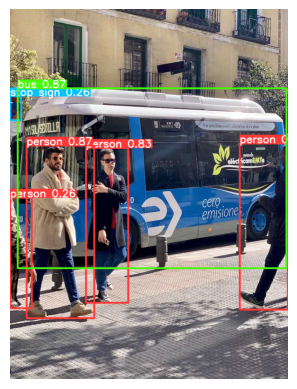

In [4]:
# Step 4: Display results

for r in results:
    annotated_img = r.plot()   # returns an annotated numpy array (BGR)
    
    # Save the annotated image
    cv2.imwrite("output.jpg", annotated_img)

    # Show inline (Jupyter / Colab)
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [5]:
# Step 5: Print detected objects
for r in results:
    for box, cls, conf in zip(r.boxes.xyxy, r.boxes.cls, r.boxes.conf):
        print(f"Detected {model.names[int(cls)]} with confidence {conf:.2f}")


Detected bus with confidence 0.87
Detected person with confidence 0.87
Detected person with confidence 0.85
Detected person with confidence 0.83
Detected person with confidence 0.26
Detected stop sign with confidence 0.26


In [6]:
# Step 6: (Optional) Run on webcam
# Uncomment to try
cap = cv2.VideoCapture(0)  # open webcam
while True:
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame)
    annotated_frame = results[0].plot()
    cv2.imshow("YOLOv8 Webcam Detection", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


0: 480x640 1 person, 1 chair, 103.8ms
Speed: 3.5ms preprocess, 103.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 102.2ms
Speed: 3.3ms preprocess, 102.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 bed, 99.9ms
Speed: 4.5ms preprocess, 99.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 couch, 1 bed, 97.5ms
Speed: 2.0ms preprocess, 97.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 bed, 99.1ms
Speed: 1.4ms preprocess, 99.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 bed, 97.7ms
Speed: 2.0ms preprocess, 97.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 chair, 1 bed, 98.8ms
Speed: 2.0ms preprocess, 98.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 pe